In [2]:
from google.colab import userdata
token = userdata.get('hf_token')

In [3]:
!pip install bitsandbytes accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch
import re
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
%%time
# 4-bit quantization config
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

token = "you-token"
model_name = "mistralai/Mistral-7B-Instruct-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=token)
model = AutoModelForCausalLM.from_pretrained(model_name, use_auth_token=token,
                                             quantization_config=quantization_config,
                                             device_map="auto")

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:898: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:476: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

CPU times: user 38.9 s, sys: 35.9 s, total: 1min 14s
Wall time: 3min


MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): MistralMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): MistralRMSNorm((4096,), eps=1e-05)
      )
    )
    (norm): Mist

In [6]:
%%time

# Extract numbers from model output
def extract_numbers(text):
    matches = re.findall(r"[-+]?\d*\.\d+|\d+", text)
    return [float(m) for m in matches] if matches else []

# Query Mistral 7B
def query_mistral(prompt):
    inputs = tokenizer(prompt, return_tensors="pt", max_length=20000).to(device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=8000,  # Enough for 240 numbers
            do_sample=False,
            pad_token_id=tokenizer.eos_token_id
        )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"\nRaw Mistral output -> : {response}")
    predicted_temps = extract_numbers(response)

    return predicted_temps

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs


In [7]:
data = pd.read_csv("/content/weatherHistory.csv")
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [8]:
data = data.drop(columns=['Formatted Date', 'Summary', 'Precip Type',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'])


data = data.head(1441)
X = data.iloc[:1200]
Y = data.iloc[1201:1441]

In [9]:
input_str = ",".join(str(x) for x in X.values.flatten())
input_str

'9.47222222222222,9.355555555555558,9.377777777777778,8.288888889,8.755555555555553,9.22222222222222,7.733333333333334,8.772222222,10.82222222222222,13.77222222222222,16.016666666666666,17.144444444444446,17.800000000000004,17.333333333333332,18.87777777777778,18.911111111111115,15.38888888888889,15.550000000000002,14.255555555555553,13.144444444444442,11.55,11.183333333333334,10.116666666666667,10.2,10.42222222222222,9.911111111111111,11.183333333333334,7.155555555555556,6.111111111111111,6.788888888888888,7.261111111,7.799999999999999,9.872222222222224,12.22222222222222,15.094444444444449,17.355555555555558,19.00555555555555,20.04444444444444,21.05,21.18333333333333,20.11666666666666,20.216666666666665,20.0,17.800000000000004,16.06111111111111,15.02222222222222,14.422222222222224,14.255555555555553,13.77222222222222,13.283333333333331,8.633333333333333,11.25,11.183333333333334,10.694444444444445,11.11111111111111,11.11111111111111,12.166666666666666,12.755555555555556,13.838888888888

In [10]:
prompt = f"""
Here is 1200 rows of hourly weather data:

{input_str}

Can you predict the next 10 days (240) hours) of hourly 'Temperature (C)' values in the same format?
Reply with a comma‑separated list of numbers.
"""

predictions = query_mistral(prompt)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.



Raw Mistral output -> : 
Here is 1200 rows of hourly weather data:

9.47222222222222,9.355555555555558,9.377777777777778,8.288888889,8.755555555555553,9.22222222222222,7.733333333333334,8.772222222,10.82222222222222,13.77222222222222,16.016666666666666,17.144444444444446,17.800000000000004,17.333333333333332,18.87777777777778,18.911111111111115,15.38888888888889,15.550000000000002,14.255555555555553,13.144444444444442,11.55,11.183333333333334,10.116666666666667,10.2,10.42222222222222,9.911111111111111,11.183333333333334,7.155555555555556,6.111111111111111,6.788888888888888,7.261111111,7.799999999999999,9.872222222222224,12.22222222222222,15.094444444444449,17.355555555555558,19.00555555555555,20.04444444444444,21.05,21.18333333333333,20.11666666666666,20.216666666666665,20.0,17.800000000000004,16.06111111111111,15.02222222222222,14.422222222222224,14.255555555555553,13.77222222222222,13.283333333333331,8.633333333333333,11.25,11.183333333333334,10.694444444444445,11.11111111111111,11.

In [11]:
len(predictions)

1141

In [12]:
y_actual = [float(y) for y in Y.values.flatten()]

In [14]:
predictions00 = predictions[:240]

In [15]:
mae = mean_absolute_error(y_actual, predictions00)
mse = mean_squared_error(y_actual, predictions00)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, predictions00)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 10.144861111110648
MSE: 5874.587094135785
RMSE: 76.64585503558418
R^2: -521.6859036242087


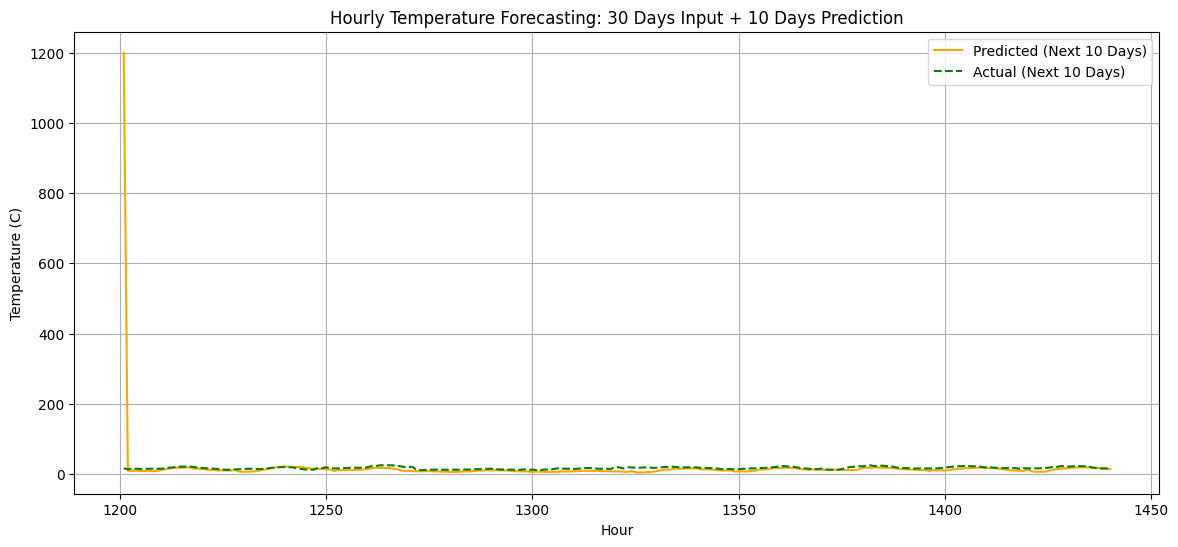

In [18]:
# Plot
plt.figure(figsize=(14, 6))
plt.plot(range(1201, 1201 + 240), predictions00, label='Predicted (Next 10 Days)', color='orange')
plt.plot(range(1201, 1201 + 240), y_actual, label='Actual (Next 10 Days)', color='green', linestyle='--')
plt.xlabel('Hour')
plt.ylabel('Temperature (C)')
plt.title('Hourly Temperature Forecasting: 30 Days Input + 10 Days Prediction')
plt.legend()
plt.grid(True)
plt.show()


## More predictions

In [19]:
data = pd.read_csv("/content/weatherHistory.csv")
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [20]:
data = data.drop(columns=['Formatted Date', 'Summary', 'Precip Type',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'])

data = data.head(9505)
X = data.iloc[:8761]
Y = data.iloc[8761:9505]

In [21]:
input_str = ",".join(str(x) for x in X.values.flatten())
input_str

'9.47222222222222,9.355555555555558,9.377777777777778,8.288888889,8.755555555555553,9.22222222222222,7.733333333333334,8.772222222,10.82222222222222,13.77222222222222,16.016666666666666,17.144444444444446,17.800000000000004,17.333333333333332,18.87777777777778,18.911111111111115,15.38888888888889,15.550000000000002,14.255555555555553,13.144444444444442,11.55,11.183333333333334,10.116666666666667,10.2,10.42222222222222,9.911111111111111,11.183333333333334,7.155555555555556,6.111111111111111,6.788888888888888,7.261111111,7.799999999999999,9.872222222222224,12.22222222222222,15.094444444444449,17.355555555555558,19.00555555555555,20.04444444444444,21.05,21.18333333333333,20.11666666666666,20.216666666666665,20.0,17.800000000000004,16.06111111111111,15.02222222222222,14.422222222222224,14.255555555555553,13.77222222222222,13.283333333333331,8.633333333333333,11.25,11.183333333333334,10.694444444444445,11.11111111111111,11.11111111111111,12.166666666666666,12.755555555555556,13.838888888888

In [ ]:
%%time

prompt = f"""
Here is 8760 rows of hourly weather data:

{input_str}

Can you predict the next 31 days that is 744 hours of hourly 'Temperature (C)' values in the same format?
Reply with a comma‑separated list of 744 numbers.
"""

predictions = query_mistral(prompt)

In [ ]:
len(predictions)

In [ ]:
y_actual = [float(y) for y in Y.values.flatten()]

In [ ]:
mae = mean_absolute_error(y_actual, predictions)
mse = mean_squared_error(y_actual, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")